In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('New_folder/weight-height.csv')
data

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [3]:
# convert inch to cm
data['Height'] = data['Height'] * 2.54
# convert pond to kg
data['Weight'] = data['Weight'] / 2.205

data

,Gender,Height,Weight
0,Male,187.571423,109.702296
1,Male,174.706036,73.610192
2,Male,188.239668,96.481114
3,Male,182.196685,99.792504
4,Male,177.499761,93.582676
...,...,...,...
9995,Female,168.078536,62.030591
9996,Female,170.350573,77.491114
9997,Female,162.224700,58.265451
9998,Female,175.346978,74.309506


(array([  23.,  218.,  926., 1906., 2196., 2167., 1612.,  765.,  163.,
          24.]),
 array([137.82835865, 144.11120334, 150.39404803, 156.67689272,
        162.95973741, 169.2425821 , 175.52542679, 181.80827149,
        188.09111618, 194.37396087, 200.65680556]),
 <BarContainer object of 10 artists>)

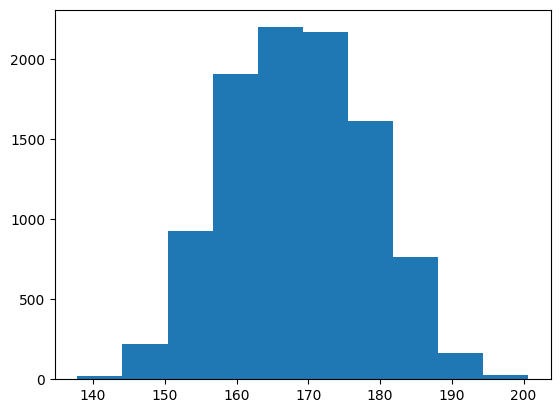

In [4]:
plt.hist(data['Height'])

(array([  15.,  278., 1241., 2175., 1849., 2016., 1747.,  598.,   71.,
          10.]),
 array([ 29.34246109,  38.65264576,  47.96283042,  57.27301508,
         66.58319974,  75.8933844 ,  85.20356906,  94.51375373,
        103.82393839, 113.13412305, 122.44430771]),
 <BarContainer object of 10 artists>)

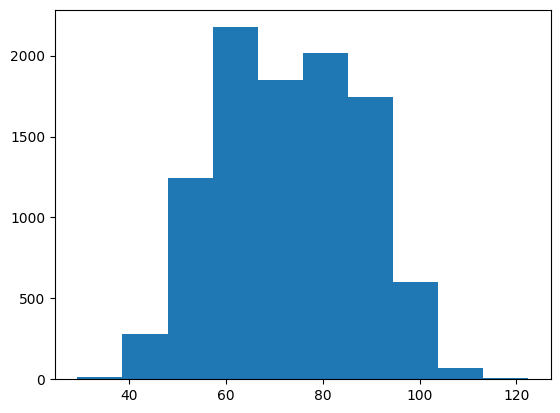

In [5]:
plt.hist(data["Weight"])

In [6]:
data = data.replace(['Male','Female'], [1,0])
data

,Gender,Height,Weight
0,1,187.571423,109.702296
1,1,174.706036,73.610192
2,1,188.239668,96.481114
3,1,182.196685,99.792504
4,1,177.499761,93.582676
...,...,...,...
9995,0,168.078536,62.030591
9996,0,170.350573,77.491114
9997,0,162.224700,58.265451
9998,0,175.346978,74.309506


Text(0, 0.5, 'height')

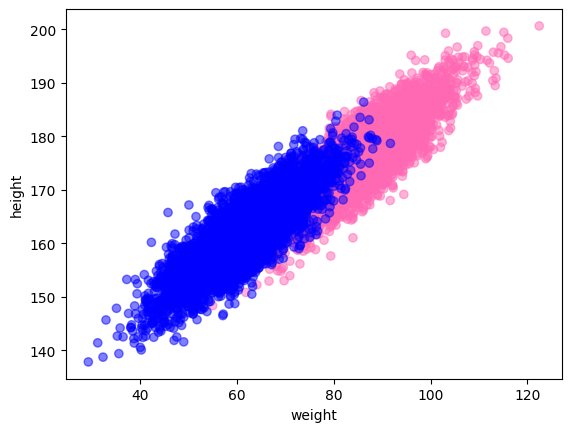

In [7]:
colors = ['blue','hotpink']
plt.scatter(data['Weight'], data['Height'], c= data['Gender'], cmap= ListedColormap(colors), alpha= 0.5)
plt.xlabel('weight')
plt.ylabel('height')

In [8]:
X_train = np.array(data['Weight'], data['Height']).T
X_train.shape

Y_train = np.array(data['Gender'])
Y_train.shape

(10000,)

In [12]:
class kNearestNeighbors:
    def __init__(self, k):
        self.k = k
    
    #train    
    def fit(self, X_train, Y_train):
        self.X_train = X_train
        self.Y_train = Y_train
         
    #calculate distance
    def euclidianDistance(self, a, b):
        distance = np.sqrt(np.sum((a-b)**2))
        return distance
    
    # return array of nearest neighbors
    def nearNeighbors(self, X_test):
        dists= []
        for x_train in self.X_train:
            dist = self.euclidianDistance(x_train, X_test)
            dists.append(dist)
            
        index_sorted = np.argsort(dists)
        #Gender of index
        gender_sorted = self.Y_train[index_sorted]
        # namayesh gender az avalin ta k omin hamsayeh
        return gender_sorted[0:self.k]
        
    def predict(self, X_test):
        neighbors = self.nearNeighbors(X_test)
        Y_test = np.argmax(np.bincount(neighbors))
        
        return Y_test
    
    def evaluate(self, X_test, Y_test):
        correct = 0
        test_array = []
        for x in X_test:
            test = self.predict(x)
            test_array.append(test)
        for i in range(len(test_array)):
            if test_array[i] == Y_test[i]:
                correct +=1
        
        accuracy = correct/len(Y_test)
        return accuracy

In [13]:
knn = kNearestNeighbors(k=5)
knn.fit(X_train,Y_train)

X_test = np.array([56, 169])
answer = knn.predict(X_test)
answer

1

In [14]:
x_train, x_test, y_train, y_test= train_test_split(X_train, Y_train, test_size=0.01, random_state=42)
knn.evaluate(x_test,y_test)

0.94